<a href="https://colab.research.google.com/github/akhiltabjula/ComputationalMethodsForInformationSystems/blob/master/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [ ]:
#Write your code here.
import pandas as pd
import numpy as np

In [ ]:
review_df = pd.read_csv("/content/Sentiment Analysis and Text Classification (1).csv").dropna()
review_df = review_df[["review","sentiment"]]

In [ ]:
review_df.head(5)

,review,sentiment
0,"Every once in a while a movie comes, that trul...",positive
1,This is a movie that only those who have felt ...,Neutral
2,"Truly a masterpiece, The Best Hollywood film o...",Positive
3,Joaquin Phoenix gives a tour de force performa...,Positive
4,Most of the time movies are anticipated like t...,Neutral


In [ ]:
review_df["review"] = review_df["review"].apply(lambda x : str(x).lower())
import string
review_df["review"] = review_df["review"].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
review_df["review"] = review_df["review"].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords_list]))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

from nltk.tokenize import word_tokenize 
import textblob
nltk.download('wordnet')
review_df["review"] = review_df["review"].apply(lambda x: ' '.join(word_tokenize(str(x)))).to_frame()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
review_df.head(5) 

,review,sentiment
0,every movie comes truly makes impact joaquins ...,positive
1,movie felt alone isolated truly relate underst...,Neutral
2,truly masterpiece best hollywood film 2019 one...,Positive
3,joaquin phoenix gives tour de force performanc...,Positive
4,time movies anticipated like end falling short...,Neutral


In [ ]:
#k-means

from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
transformVector = countvectorizer.fit_transform(review_df["review"].values)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 5,max_iter=3000,init='k-means++', n_jobs = -1,random_state=10)
kmeans_model.fit(transformVector)
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [ ]:
kmeans_model.cluster_centers_

array([[0.02298851, 0.02298851, 0.01149425, ..., 0.        , 0.        ,
        0.01149425],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(transformVector, kmeans_model.labels_, metric='euclidean'))

0.4786903787533268


In [ ]:
kmeans_df = pd.DataFrame(review_df["review"].values, columns = {"review"})
kmeans_df["labels"] = kmeans_model.labels_

In [ ]:
kmeans_df.head(5)

,review,labels
0,every movie comes truly makes impact joaquins ...,0
1,movie felt alone isolated truly relate underst...,0
2,truly masterpiece best hollywood film 2019 one...,0
3,joaquin phoenix gives tour de force performanc...,0
4,time movies anticipated like end falling short...,0


In [ ]:
np.unique(kmeans_df["labels"].values)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:

centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    tokens = [countvectorizer.get_feature_names()[i] for i in centroids[i, 2:10]]
    print('CLUSTER NUMBER'+str(i+1))
    print('TOKENS:', tokens,"\n\n\n")

CLUSTER NUMBER1
TOKENS: ['film', 'best', 'joaquin', 'phoenix', 'one', 'like', 'character', 'people'] 



CLUSTER NUMBER2
TOKENS: ['like', 'good', 'would', 'films', 'arthur', 'story', 'people', 'violent'] 



CLUSTER NUMBER3
TOKENS: ['joaquin', 'action', 'far', 'appreciate', 'character', 'performance', 'comic', 'one'] 



CLUSTER NUMBER4
TOKENS: ['phoenix', 'phillips', 'comic', 'take', 'fleck', 'book', 'film', 'us'] 



CLUSTER NUMBER5
TOKENS: ['get', 'think', 'maybe', 'overrated', 'like', 'never', 'marvel', 'worse'] 





In [ ]:
#DBSCAN

from sklearn.cluster import DBSCAN

dbscan_df = pd.DataFrame(review_df["review"].values, columns = {"review"})
dbscan_df.head(5)


,review
0,every movie comes truly makes impact joaquins ...
1,movie felt alone isolated truly relate underst...
2,truly masterpiece best hollywood film 2019 one...
3,joaquin phoenix gives tour de force performanc...
4,time movies anticipated like end falling short...


In [ ]:
list_of_values = list()

for i in dbscan_df["review"]:
  list_of_values.append(i.split())

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_values, size=1, workers=5)

In [ ]:
sent_vectors = list(); # the avg-w2v for each sentence/review is stored in this train
count = 0;
for sent in list_of_values: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =1; # num of words with a valid vector in the sentence/review
    count = count+1
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [ ]:
# Computing 50th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute50thnearestneighbour(x, data): # Returns the distance of 100th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 50 and dists[49] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 50 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[49] # Dist 49 contains the distance of 50th nearest neighbour.

In [ ]:
# Computing the 50th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:100]:
    twohundrethneigh.append( compute50thnearestneighbour(val, sent_vectors[:100]) )
twohundrethneigh.sort()

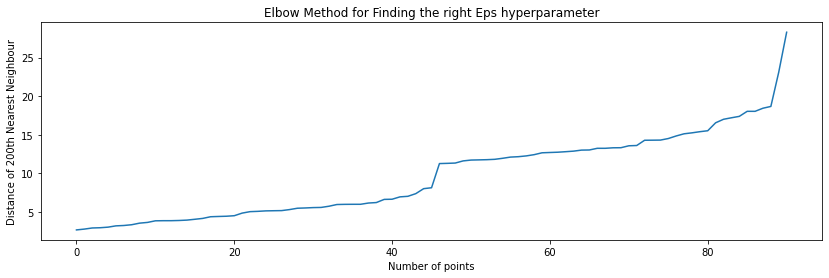

In [ ]:
import matplotlib.pyplot as plt

# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps = 8, min_samples = 1000,metric='euclidean')
dbscan_model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1000, n_jobs=None, p=None)

In [ ]:
dbscan_df['DBSCAN Cluster Labels'] = dbscan_model.labels_

In [ ]:
dbscan_df.head(5)

,review,DBSCAN Cluster Labels
0,every movie comes truly makes impact joaquins ...,-1
1,movie felt alone isolated truly relate underst...,-1
2,truly masterpiece best hollywood film 2019 one...,-1
3,joaquin phoenix gives tour de force performanc...,-1
4,time movies anticipated like end falling short...,-1


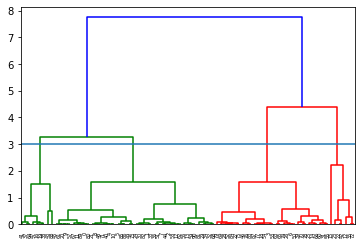

In [ ]:
#Hierarchical clustering

import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=3)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

heirarchial_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  #took n=4 from dendrogram curve 
op = heirarchial_model.fit_predict(sent_vectors)

In [ ]:
heirarchialModel_df = pd.DataFrame(review_df["review"].values, columns = {"review"})
heirarchialModel_df["AVG-W2V Clus Label"] = heirarchial_model.labels_

In [ ]:
heirarchialModel_df.head(5)

,review,AVG-W2V Clus Label
0,every movie comes truly makes impact joaquins ...,1
1,movie felt alone isolated truly relate underst...,1
2,truly masterpiece best hollywood film 2019 one...,1
3,joaquin phoenix gives tour de force performanc...,2
4,time movies anticipated like end falling short...,1


In [ ]:
np.unique(heirarchial_model.labels_)

array([0, 1, 2, 3])

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
Hierarchical clustering builds hierarchy of clusters and this algorithm starts by assigning datapoints to their own cluster. Later two clusters are merged to form one cluster and the algorithm ends when only one cluster is left best when the requirement is to find hidden structures inside  data. While K- Means is an iterative algorithm which will find local maxima for each iteration. And this will work great with large number  of datasets. On other hand, density model like DBSCAN forms clusters that are  arbitary in shape and might not have same feature size hence it can best handel outliers and noisy datasets.